In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


season_21 = pd.read_csv('data/TBR Capstone Data/pitches_21.csv')
season_22 = pd.read_csv('data/TBR Capstone Data/pitches_22.csv')
season_23 = pd.read_csv('data/TBR Capstone Data/pitches_23.csv')

In [3]:
season_21.columns

Index(['Unnamed: 0', 'gameid', 'GameDate', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name'],
      dtype='object')

In [4]:
season_22.dtypes

Unnamed: 0            int64
gameid               object
GameDate             object
ab                    int64
pitchnum              int64
inning              float64
teambat               int64
balls               float64
strikes             float64
outs                float64
pitcher              object
pitcherthrows        object
batter               object
batterside           object
pitchresult          object
pitchresult_desc     object
eventtype            object
pitchname            object
pitchname_desc       object
spinrate            float64
relspeed            float64
horzbreak           float64
inducedvertbreak    float64
platelocside        float64
platelocheight      float64
hometeam_id           int64
Home                 object
awayteam_id           int64
Visitor              object
venue_id              int64
venue_name           object
dtype: object

## Adding a Date and Time Column with datetime pandas objects 

In [5]:
season_21['GameDate'] = pd.to_datetime(season_21['GameDate'])
season_21['Date'] = season_21['GameDate'].dt.date
season_21['Time'] = season_21['GameDate'].dt.time

cols = list(season_21.columns)
# find index of GameDate
idx = cols.index('GameDate')
# Basically put Date and Time right next to GameDate 
new_cols = cols[:idx + 1] + ['Date', 'Time'] + cols[idx + 1:-2]

season_21 = season_21[new_cols].copy()
season_21

,Unnamed: 0,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,1,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,1,4.0,1,0.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,2,4.0,1,0.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,3,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,3,4.0,1,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,4,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,1,4.0,1,0.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,5,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,35,1,5.0,0,0.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,706905,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,42,8,5.0,1,0.0,...,12.777756,5.362740,-0.295482,2.166446,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706905,706906,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,43,1,5.0,1,0.0,...,7.615064,-0.164651,-0.438475,1.132619,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706906,706907,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,43,2,5.0,1,0.0,...,5.507193,14.064531,0.894155,2.744111,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706907,706908,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,43,3,5.0,1,1.0,...,5.922451,13.146690,0.216244,3.111117,144,Atlanta Braves,121,New York Mets,4705,Truist Park


## Sorting the DataFrame chronologically - then by Team Name, and then by "at bats"

In [6]:
season_21  = season_21.sort_values(by = ['Date', 'Home', 'ab'])
season_21 = season_21.drop(columns = ['Unnamed: 0'])
season_21
#season_21.to_csv('data/pitches.csv')



,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
104858,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,1,1.0,0,0.0,0.0,...,7.899302,20.196724,-0.925614,3.118610,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
104859,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,2,1.0,0,1.0,0.0,...,3.684525,20.294086,-0.000916,1.945728,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
104860,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,3,1.0,0,1.0,1.0,...,7.670026,18.184725,-1.969467,3.548406,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
104861,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,4,1.0,0,2.0,1.0,...,7.343168,19.395239,-1.160865,2.435223,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
104862,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,5,1.0,0,3.0,1.0,...,5.351965,17.362413,0.046086,2.654030,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563007,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,4,9.0,1,1.0,2.0,...,2.049364,18.104872,0.719018,2.699417,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
563008,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,5,9.0,1,1.0,2.0,...,-4.902229,-20.987835,0.399907,1.736541,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
563009,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,1,9.0,1,0.0,0.0,...,0.660327,19.385929,0.487332,2.043276,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
565478,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,2,9.0,1,0.0,1.0,...,0.548382,20.448322,0.333695,3.081872,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park


In [7]:
season_21 = season_21.sort_values(by=['gameid', 'ab', 'pitchnum'])

# Step 2: Identify strikeout events
strikeout_df = season_21[season_21['eventtype'] == 'strikeout']

# Step 3: For each strikeout, find the previous pitch (the one immediately before the strikeout)
# Create a new column that shifts the pitchname by 1 to represent the previous pitch
season_21['prev_pitchname'] = season_21['pitchname'].shift(1)

# Also shift other columns to ensure the previous pitch belongs to the same at-bat and game
season_21['prev_gameid'] = season_21['gameid'].shift(1)
season_21['prev_ab'] = season_21['ab'].shift(1)

# Step 4: Filter for pitches that are strikeouts and where the previous pitch is from the same game and at-bat
strikeout_with_prev_pitch = season_21[
    (season_21['eventtype'] == 'strikeout') &
    (season_21['gameid'] == season_21['prev_gameid']) &
    (season_21['ab'] == season_21['prev_ab'])
]

# Step 5: Group by the previous pitch and the strikeout pitch
pitch_pairs = strikeout_with_prev_pitch.groupby(
    ['prev_pitchname', 'pitchname']
).size().reset_index(name='count')

# Step 6: Sort the results by count to find the most common pitch pairs (previous and strikeout pitch)
most_common_pitch_pairs = pitch_pairs.sort_values(by='count', ascending=False)

# Step 7: Display the most common pitch pairs leading to strikeouts
print(most_common_pitch_pairs)
print(most_common_pitch_pairs.nunique())

   prev_pitchname pitchname  count
37             FF        FF   6483
83             SL        SL   4612
42             FF        SL   3424
78             SL        FF   2604
0              CH        CH   1614
..            ...       ...    ...
54             FT        FT      1
80             SL        FT      1
11             CS        KC      1
57             KC        CU      1
74             SL        CS      1

[84 rows x 3 columns]
prev_pitchname    12
pitchname         12
count             62
dtype: int64


In [8]:
season_22 = season_22.sort_values(by=['gameid', 'ab', 'pitchnum'])

# Step 2: Identify strikeout events
strikeout_df22 = season_22[season_22['eventtype'] == 'strikeout']

# Step 3: For each strikeout, find the previous pitch (the one immediately before the strikeout)
# Create a new column that shifts the pitchname by 1 to represent the previous pitch
season_22['prev_pitchname'] = season_22['pitchname'].shift(1)

# Also shift other columns to ensure the previous pitch belongs to the same at-bat and game
season_22['prev_gameid'] = season_22['gameid'].shift(1)
season_22['prev_ab'] = season_22['ab'].shift(1)

# Step 4: Filter for pitches that are strikeouts and where the previous pitch is from the same game and at-bat
strikeout_with_prev_pitch22 = season_22[
    (season_22['eventtype'] == 'strikeout') &
    (season_22['gameid'] == season_22['prev_gameid']) &
    (season_22['ab'] == season_22['prev_ab'])
]

# Step 5: Group by the previous pitch and the strikeout pitch
pitch_pairs22= strikeout_with_prev_pitch22.groupby(
    ['prev_pitchname', 'pitchname']
).size().reset_index(name='count')

# Step 6: Sort the results by count to find the most common pitch pairs (previous and strikeout pitch)
most_common_pitch_pairs22 = pitch_pairs22.sort_values(by='count', ascending=False)

# Step 7: Display the most common pitch pairs leading to strikeouts
print(most_common_pitch_pairs22)
print(most_common_pitch_pairs22.nunique())

   prev_pitchname pitchname  count
37             FF        FF   6483
83             SL        SL   4612
42             FF        SL   3424
78             SL        FF   2604
0              CH        CH   1614
..            ...       ...    ...
54             FT        FT      1
80             SL        FT      1
11             CS        KC      1
57             KC        CU      1
74             SL        CS      1

[84 rows x 3 columns]
prev_pitchname    12
pitchname         12
count             62
dtype: int64


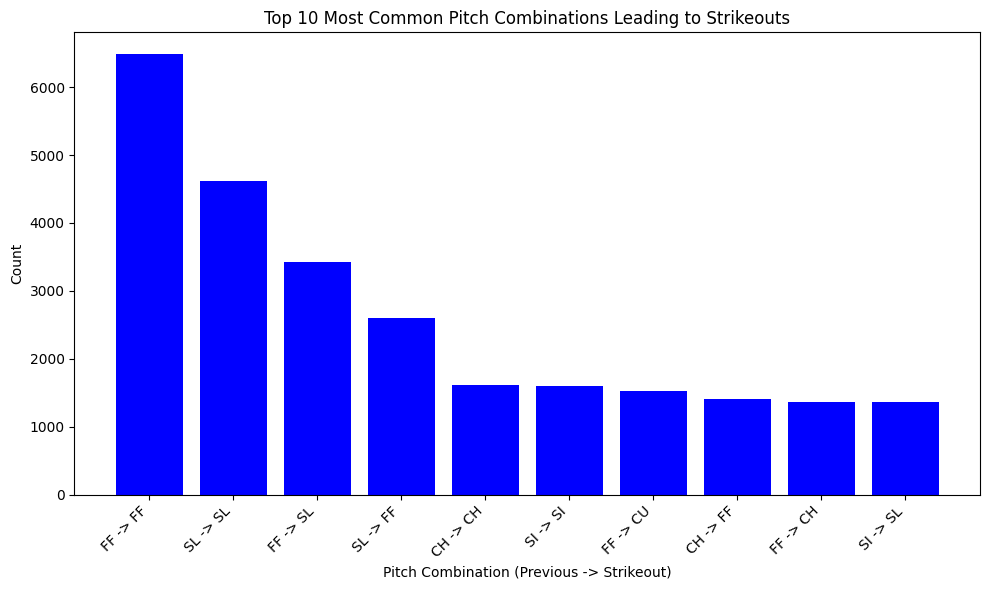

In [9]:
top_n = 10
top_pitch_pairs = most_common_pitch_pairs.head(top_n)

# Step 2: Create a bar chart
plt.figure(figsize=(10, 6))

# X-axis labels will be the combination of the previous pitch and strikeout pitch
pitch_combinations = top_pitch_pairs.apply(lambda row: f"{row['prev_pitchname']} -> {row['pitchname']}", axis=1)

# Plot the bar chart
plt.bar(pitch_combinations, top_pitch_pairs['count'], color='blue')

# Step 3: Label the chart
plt.title(f"Top {top_n} Most Common Pitch Combinations Leading to Strikeouts")
plt.xlabel('Pitch Combination (Previous -> Strikeout)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

In [10]:
season_22.head(20)

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,prev_pitchname,prev_gameid,prev_ab
97305,97306,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,1,1,1.0,0,0.0,0.0,0.0,...,2.616580,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,None,None,NaN
97304,97305,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,1,2,1.0,0,0.0,1.0,0.0,...,1.897783,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,FC,2021/04/01/arimlb-sdnmlb-1,1.0
97303,97304,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,2,1,1.0,0,0.0,0.0,1.0,...,3.500652,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,SL,2021/04/01/arimlb-sdnmlb-1,1.0
97302,97303,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,2,2,1.0,0,0.0,1.0,1.0,...,1.262922,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,FF,2021/04/01/arimlb-sdnmlb-1,2.0
97301,97302,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,2,3,1.0,0,1.0,1.0,1.0,...,2.115706,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,KC,2021/04/01/arimlb-sdnmlb-1,2.0
97300,97301,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,2,4,1.0,0,1.0,2.0,1.0,...,0.398841,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,FC,2021/04/01/arimlb-sdnmlb-1,2.0
97299,97300,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,2,5,1.0,0,2.0,2.0,1.0,...,2.396171,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,FS,2021/04/01/arimlb-sdnmlb-1,2.0
97298,97299,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,2,6,1.0,0,2.0,2.0,1.0,...,1.523295,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,SL,2021/04/01/arimlb-sdnmlb-1,2.0
97297,97298,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,3,1,1.0,0,0.0,0.0,1.0,...,2.661776,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,FC,2021/04/01/arimlb-sdnmlb-1,2.0
97296,97297,2021/04/01/arimlb-sdnmlb-1,4/1/2021 13:10,3,2,1.0,0,0.0,1.0,1.0,...,2.086423,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,FF,2021/04/01/arimlb-sdnmlb-1,3.0


In [11]:
season_23.head()

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,1,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,1,4.0,1,0.0,0.0,1.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,2,4.0,1,0.0,1.0,1.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,3,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,3,4.0,1,1.0,1.0,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,4,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,1,4.0,1,0.0,0.0,1.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,5,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,35,1,5.0,0,0.0,0.0,1.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field


## All the dataframes are the same shape!

In [12]:
print(f"shape for 21: \n {season_21.shape}")
print(f"shape for 22: \n {season_22.shape}")
print(f"shape for 23: \n {season_23.shape}")

shape for 21: 
 (706909, 35)
shape for 22: 
 (706909, 34)
shape for 23: 
 (706909, 31)


In [13]:
print(f"unique for 21: \n {season_21.nunique()}")

unique for 21: 
 gameid                2423
GameDate              1561
Date                   183
Time                   107
ab                     123
pitchnum                16
inning                  16
teambat                  2
balls                    4
strikes                  4
outs                     3
pitcher                907
pitcherthrows            2
batter                1047
batterside               2
pitchresult             16
pitchresult_desc        16
eventtype               46
pitchname               14
pitchname_desc          14
spinrate            653447
relspeed            619685
horzbreak           700866
inducedvertbreak    696006
platelocside        703379
platelocheight      692680
hometeam_id             30
Home                    30
awayteam_id             30
Visitor                 30
venue_id                32
venue_name              33
prev_pitchname          14
prev_gameid           2423
prev_ab                123
dtype: int64


In [14]:
print(f"unique for 22: \n {season_22.nunique()}")

unique for 22: 
 Unnamed: 0          706909
gameid                2423
GameDate              1561
ab                     123
pitchnum                16
inning                  16
teambat                  2
balls                    4
strikes                  4
outs                     3
pitcher                907
pitcherthrows            2
batter                1047
batterside               2
pitchresult             16
pitchresult_desc        16
eventtype               46
pitchname               14
pitchname_desc          14
spinrate            653447
relspeed            619685
horzbreak           700866
inducedvertbreak    696006
platelocside        703379
platelocheight      692680
hometeam_id             30
Home                    30
awayteam_id             30
Visitor                 30
venue_id                32
venue_name              33
prev_pitchname          14
prev_gameid           2423
prev_ab                123
dtype: int64


In [15]:
print(f"unique for 23: \n {season_23.nunique()}")
# it seems like there are 2423 unique entries in each df 


unique for 23: 
 Unnamed: 0          706909
gameid                2423
GameDate              1561
ab                     123
pitchnum                16
inning                  16
teambat                  2
balls                    4
strikes                  4
outs                     3
pitcher                907
pitcherthrows            2
batter                1047
batterside               2
pitchresult             16
pitchresult_desc        16
eventtype               46
pitchname               14
pitchname_desc          14
spinrate            653447
relspeed            619685
horzbreak           700866
inducedvertbreak    696006
platelocside        703379
platelocheight      692680
hometeam_id             30
Home                    30
awayteam_id             30
Visitor                 30
venue_id                32
venue_name              33
dtype: int64


## Looking for duplicates 

In [16]:
duplicates = season_21.duplicated()
print(duplicates.sum())
duplicates = season_22.duplicated()
print(duplicates.sum())
duplicates = season_23.duplicated()
print(duplicates.sum())
# no duplicates lets go 

0
0
0


## Creating a barplot displaying the frequency of each pitch type for each pitch result 

In [17]:
grouped_data = season_21.groupby(['pitchresult', 'pitchname']).size().reset_index(name='count')

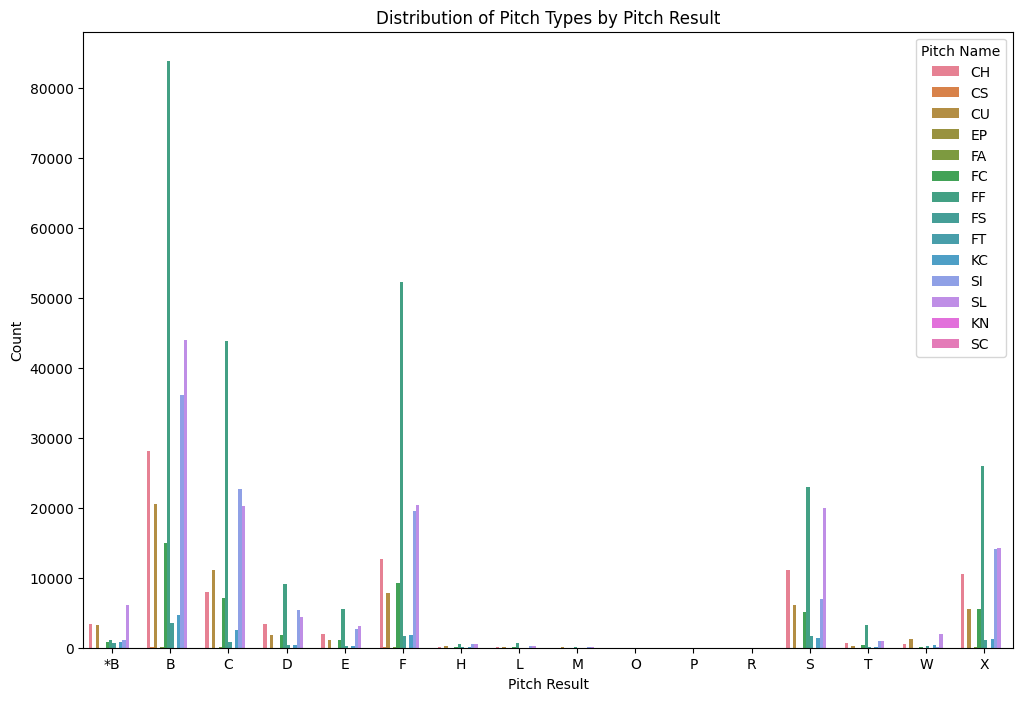

In [18]:
plt.figure(figsize=(12, 8))

# Making a barplot 
sns.barplot(x='pitchresult', y='count', hue='pitchname', data=grouped_data)

# Adding titles and labels
plt.title('Distribution of Pitch Types by Pitch Result')
plt.xlabel('Pitch Result')
plt.ylabel('Count')

plt.legend(title='Pitch Name')
plt.show()


## Showing what the Pitch Name and Pitch Result shorthands mean

In [19]:
# I have no idea what half the stuff means  
unique_pitch_results = season_21[['pitchresult', 'pitchresult_desc']].drop_duplicates()

unique_pitch_results

,pitchresult,pitchresult_desc
97305,C,Strike - Called
97304,X,Hit Into Play - Out(s)
97303,F,Strike - Foul
97302,B,Ball - Called
97298,D,Hit Into Play - No Out(s)
97297,T,Strike - Foul Tip
97288,E,Hit Into Play - Run(s)
97287,S,Strike - Swinging
97258,*B,Ball - Ball In Dirt
96889,W,Strike - Swinging Blocked


In [20]:
# I have no idea what half the stuff means (but for pitchnames) 
unique_pitch_results = season_21[['pitchname', 'pitchname_desc']].drop_duplicates()

print(unique_pitch_results.size)

unique_pitch_results

46


,pitchname,pitchname_desc
97305,FC,Cutter
97304,SL,Slider
97303,FF,Four-seam FB
97302,KC,Knuckle Curve
97300,FS,Splitter
97276,CH,Changeup
97271,CS,Slow Curve
97270,SI,Sinker
97250,CU,Curveball
72849,SC,Screwball


In [21]:
cluster_df = season_22.groupby(['pitchname']).size().reset_index(name='count')
cluster_df

,pitchname,count
0,CH,80621
1,CS,175
2,CU,59540
3,EP,43
4,FA,425
5,FC,46567
6,FF,248968
7,FS,10364
8,FT,90
9,KC,13544


In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [23]:
features = ['relspeed', 'spinrate', 'horzbreak']
# I think that these three have different distributions & they are not all pos
scaler = StandardScaler()

season_21[features] = scaler.fit_transform(season_21[features])
X = season_21[features].dropna()

In [24]:
NA_rows = season_21[season_21.isna().any(axis=1)]
# we're looking at all the rows with NaN values - at first glance it seems as if there are ~1000 rows with no spinrate information 
NA_rows 

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,prev_pitchname,prev_gameid,prev_ab
97305,2021/04/01/arimlb-sdnmlb-1,2021-04-01 13:10:00,2021-04-01,13:10:00,1,1,1.0,0,0.0,0.0,...,2.616580,135,San Diego Padres,109,Arizona Diamondbacks,2680,Petco Park,None,None,NaN
98726,2021/04/01/atlmlb-phimlb-1,2021-04-01 15:05:00,2021-04-01,15:05:00,28,1,4.0,0,0.0,0.0,...,1.845386,143,Philadelphia Phillies,144,Atlanta Braves,2681,Citizens Bank Park,FF,2021/04/01/atlmlb-phimlb-1,27.0
110770,2021/04/01/clemlb-detmlb-1,2021-04-01 12:10:00,2021-04-01,12:10:00,8,1,1.0,1,0.0,0.0,...,4.340580,116,Detroit Tigers,114,Cleveland Indians,2394,Comerica Park,FF,2021/04/01/clemlb-detmlb-1,7.0
38695,2021/04/09/anamlb-tormlb-1,2021-04-09 18:07:00,2021-04-09,18:07:00,2,1,1.0,0,0.0,0.0,...,1.679699,141,Toronto Blue Jays,108,Los Angeles Angels,2536,TD Ballpark,KC,2021/04/09/anamlb-tormlb-1,1.0
37245,2021/04/12/sdnmlb-pitmlb-1,2021-04-12 18:35:00,2021-04-12,18:35:00,13,1,2.0,1,0.0,0.0,...,2.539548,134,Pittsburgh Pirates,135,San Diego Padres,31,PNC Park,SI,2021/04/12/sdnmlb-pitmlb-1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699171,2021/10/02/sdnmlb-sfnmlb-1,2021-10-02 20:05:00,2021-10-02,20:05:00,46,3,7.0,0,1.0,1.0,...,2.828668,137,San Francisco Giants,135,San Diego Padres,2395,Oracle Park,FS,2021/10/02/sdnmlb-sfnmlb-1,46.0
698962,2021/10/02/sdnmlb-sfnmlb-1,2021-10-02 20:05:00,2021-10-02,20:05:00,51,4,7.0,1,1.0,2.0,...,3.114645,137,San Francisco Giants,135,San Diego Padres,2395,Oracle Park,FF,2021/10/02/sdnmlb-sfnmlb-1,51.0
597538,2021/10/03/sdnmlb-sfnmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,49,4,6.0,0,1.0,2.0,...,2.327676,137,San Francisco Giants,135,San Diego Padres,2395,Oracle Park,SL,2021/10/03/sdnmlb-sfnmlb-1,49.0
538681,2021/10/03/sdnmlb-sfnmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,68,3,8.0,0,0.0,2.0,...,2.034462,137,San Francisco Giants,135,San Diego Padres,2395,Oracle Park,FF,2021/10/03/sdnmlb-sfnmlb-1,68.0


In [25]:
X

,relspeed,spinrate,horzbreak
97305,-0.928929,1.045989,-0.583428
97304,-1.269308,1.474508,-1.331511
97303,0.909652,0.854880,0.423633
97302,-2.083452,1.222106,-1.065205
97301,-0.373274,1.829189,-0.499210
...,...,...,...
536047,0.415908,1.134936,-0.580658
536048,0.316262,1.081046,-0.676423
536049,1.357040,0.426368,1.377799
536050,1.291903,0.278251,1.175653


In [26]:
# Time to Cluster :) 
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

KMeans(random_state=42)

In [27]:
# Cluster assignments for each point 
X['cluster'] = kmeans.labels_

# Cluster centroids 
centroids = kmeans.cluster_centers_

In [28]:
# %matplotlib notebook

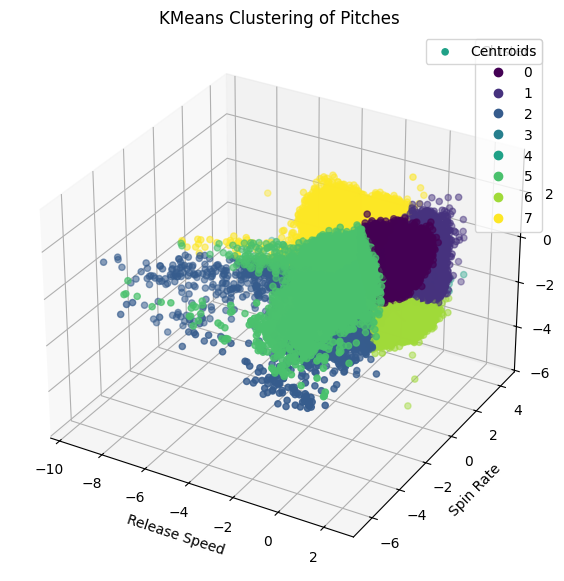

In [29]:
# Ensure that interactive mode is on
# plt.ion()  # Turns on interactive mode

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Give each cluster a diff color 
scatter = ax.scatter(X['relspeed'], X['spinrate'], X['horzbreak'], c=X['cluster'], cmap='viridis', marker='o')

# plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='x', label='Centroids')

# labels
ax.set_xlabel('Release Speed')
ax.set_ylabel('Spin Rate')
ax.set_zlabel('Horizontal Break')
ax.set_title('KMeans Clustering of Pitches')

# legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# legend for centroids
ax.legend(['Centroids'], loc='upper right')

# Show plot
plt.show()

# plt.pause(0.1)  # Small pause to keep the plot interactive

In [30]:
# Calculate the silhouette score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score}')